# Zestaw 10. Dyskretna transformacja Fouriera

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## 1. FFT

<i>1. Zaimplementuj funkcję realizującą DFT jako iloczyn macierzy Fouriera F n i n- elementowego wektora wejściowego (y = F n x). </i>

In [4]:
def dft(x):
    n = len(x)
    ksi = np.exp(-2*np.pi*1j/n)
    F = np.array([[ksi**(j*k) for j in range(n)] for k in range(n)], dtype=complex)
    return F@x, F

<i>2. Zaimplementuj również IDFT korzystając z tożsamosci:
Sprawdź poprawność działania funkcji realizującej DFT stosując transformację odwrotną oraz porównując uzyskane wyniki z wyjściem funkcji bibliotecznej. </i>

In [5]:
def idft(y, F):
    return np.conjugate(F)@y/len(y)

In [20]:
x = np.ones(8)
y, F = dft(x)
x_inverted = idft(y, F)
numpy_y = np.fft.fft(x)
print('x: ', x)

print('y: (after dft)', y)
print('y: (after dft numpy)', numpy_y)

print('x: (after idft)', x_inverted)
print('x: (after idft numpy)', np.fft.ifft(numpy_y))

print('\ncorrect? ', np.allclose(y, numpy_y) and np.allclose(x, x_inverted))

x:  [1. 1. 1. 1. 1. 1. 1. 1.]
y: (after dft) [ 8.00000000e+00+0.00000000e+00j -1.11022302e-15-4.44089210e-16j
 -8.88178420e-16-8.88178420e-16j -5.55111512e-16-1.22124533e-15j
  0.00000000e+00-1.77635684e-15j  8.88178420e-16-2.22044605e-15j
  2.66453526e-15-2.66453526e-15j  7.54951657e-15-2.99760217e-15j]
y: (after dft numpy) [8.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
x: (after idft) [1.-1.52655666e-15j 1.-1.11503469e-15j 1.-6.80011603e-16j
 1.-2.26856271e-16j 1.+1.94289029e-16j 1.+6.70945481e-16j
 1.+1.12410081e-15j 1.+1.55912390e-15j]
x: (after idft numpy) [1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]

correct?  True


<i>3. Zaimplementuj rekurencyjny algorytm Cooleya-Turkeya realizujący szybką transformację Fouriera (FFT). Porównaj szybkość jego działania z implementacją biblioteczną oraz implementacją z mnożeniem wektora przez macierz F n dla danych
o różnym rozmiarze. </i>

## 2. DFT w 1D 

* Wygeneruj dwa sygnały czasowo-amplitudowe:

a) Sygnał będący sumą pięciu sygnałów sinusoidalnych o różnych częstotliwościach

In [99]:
def signal_a(a=0, b=40):
    x = np.linspace(a, b, 10000)
    signals = [np.sin(x), np.sin(2*x), np.sin(3*x), np.sin(4*x), np.sin(5*x)]
    
    fig, ax = plt.subplots(2, 1, figsize=(20, 5))
    for signal in signals:
        ax[0].plot(x, signal)
    
    sum_signal = np.sum(signals, axis=0)
    ax[1].plot(x, sum_signal)
    return x, sum_signal

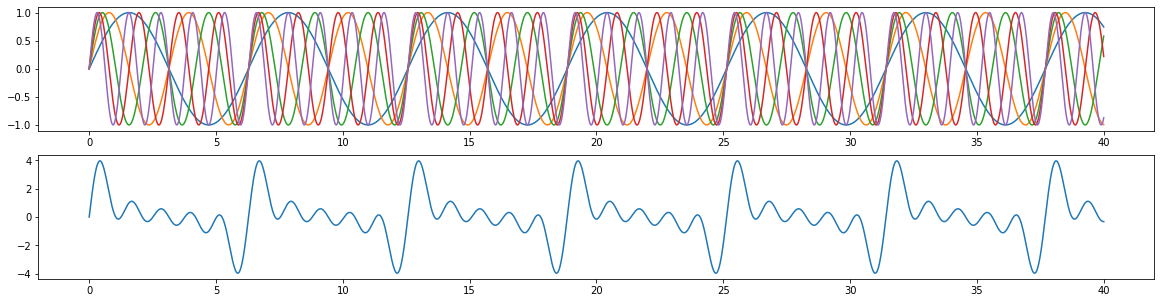

In [100]:
x, signala = signal_a()

b) Sygnał złożony z pięciu sygnałów o tych samych częstotliwościach co w punkcie a), ale ułożonych przedziałami, tzn. w każdym z pięciu przedziałów o tej samej szerokości występuje sygnał o jednej częstotliwości

In [69]:
def signal_b(a=0, b=50):
    x = np.linspace(a, b, 10000)
    interval = len(x)//5
    signal = np.sin(x[:interval])
    signal = np.concatenate([signal, np.sin(2*x[interval:2*interval])])
    signal = np.concatenate([signal, np.sin(3*x[2*interval:3*interval])])
    signal = np.concatenate([signal, np.sin(4*x[3*interval:4*interval])])
    signal = np.concatenate([signal, np.sin(5*x[4*interval:5*interval])])
    return x, signal

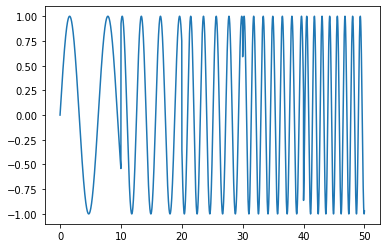

In [70]:
plot_signal(*signal_b())

* Dokonaj transformacji sygnałów a) i b) do domeny częstotliwościowej, porównaj
otrzymane wyniki. Przedstaw na osobnych wykresach część rzeczywistą i część
urojoną wyniku transformacji.

wykresy i interpretacja, dlaczego to się tak zachowuje

## Wnioski